# Exercise 06:  nearest neighbor classification

In [ ]:
import numpy as np
from matplotlib import pylab as plt


# Nearest neighbor classification

The nearest neighbor classifier is one of the simplest machine learning methods available.
Here's the simplest version of it:

```
Nearest neighbor classifier

- Find the example in the training data that is closest to
  the example that needs to be classified.
- Return its label
```

In [ ]:
def distance(x1, x2):
    return np.linalg.norm(x1-x2)

distance(np.array([2,1]), np.array([1,0]))

1.4142135623730951

Now we are ready to implement the nearest neighbor classifier:

In [ ]:
class nearest_neighbor:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.X = X
        self.y = y
    def get_nearest(self, x):
        distances = [distance(x, self.X[i]) for i in range(len(self.X))]
        return np.argmin(distances)
    def predict(self, x) :
        return self.y[self.get_nearest(x)]

### Exercise:  Accuracy with increasing levels of noise

The nearest neighbor classifier is not robust to the existence of noisy features.  To demonstrate that, use the dataset below and add increasing number of noisy features.  Compute the accuracy of the classifier as you add an increasing number of noise features.

Noise features can be added using the numpy [normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) method of a random number generator, which samples random numbers from a normal distribution.
For example:

In [ ]:
from numpy.random import default_rng
rng = default_rng(1)
# parameters of rng.normal:
# mean, standard deviation, and size of the output array
rng.normal(0, 0.5, size=(2,3))

array([[ 0.1727921 ,  0.41080907,  0.16521854],
       [-0.65157862,  0.45267793,  0.22318729]])

For this exercise, use the following dataset in two dimensions for which the nearest neighbor classifier performs well without noise:

0.9

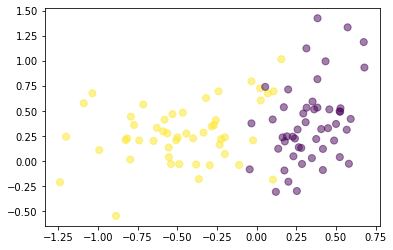

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=0.35, random_state=1)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=50);

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.3, shuffle=True, random_state=1)
nn = nearest_neighbor()
nn.fit(X_train, y_train)
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])

np.sum(y_pred == y_test)/len(y_test)

To add the noise features to the feature matrix you can use the Numpy [hstack](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html) method.  For example to add two noise features:

In [ ]:
num_noise = 2
X_train_noise = np.hstack((X_train, 
                           rng.normal(0, 0.5, size=(len(X_train),num_noise))))
# print(X_train.shape, X_test.shape)
X_test_noise = np.hstack((X_test, 
                          rng.normal(0, 0.5, size=(len(X_test),num_noise)))) 

In [ ]:
print(X_train_noise.shape,X_test_noise.shape)


(70, 4) (30, 4)


In your code, add noise features to the dataset, as described above, where the number of noise features increases from 2 to 32, using the values `[2, 4, 8, 16, 32]`.  Plot the accuracy of the classifier as a function of the number of noise features. 

In [ ]:
nn = nearest_neighbor()
nn.fit(X_train, y_train)
# print(X_train, X_test, y_train, y_test)
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])


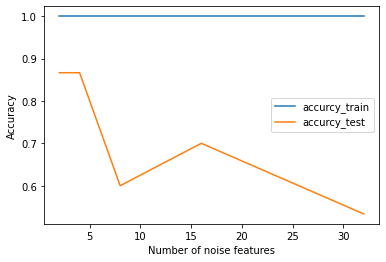

In [ ]:
noise_features = [2, 4, 8, 16, 32];
accurcy_test = []
accurcy_train = []
for n in noise_features:

  X_train = np.hstack((X_train, 
                           rng.normal(0, 0.5, size=(len(X_train),n))))
  X_test = np.hstack((X_test, 
                          rng.normal(0, 0.5, size=(len(X_test),n))))
  nn = nearest_neighbor()
  nn.fit(X_train, y_train)
  y_pred_test = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])
  y_pred_train = np.array([nn.predict(X_train[i]) for i in range(len(X_train))])

  accurcy_test.append(np.sum(y_pred_test == y_test)/len(y_test))
  accurcy_train.append(np.sum(y_pred_train == y_train)/len(y_train))
# print(X_train_noise.shape,X_test_noise.shape)

# print(accurcy_test, accurcy_train)


plt.plot(noise_features, accurcy_train,label = "accurcy_train")
plt.plot(noise_features, accurcy_test,label = "accurcy_test")
plt.xlabel("Number of noise features")
plt.ylabel("Accuracy")
plt.legend();



### Exercise:  a faster Numpy implementation

Whereas our rudimentary implementation of the nearest neighbor classifier takes in a single vector as input, the nearest neighbor implementation in scikit-learn takes a matrix of test examples.
Furthermore, our implementation requires two for loops:  one in `get_nearest`, and another for looping over the test examples.
In this exercise, extend our naive implementation of the nearest neighbor classifier and improve its efficiency so that fewer for loops would be required for computing predictions.

In [ ]:
from pandas.io.formats.printing import PrettyDict
class nearest_neighbor_new:
    def __init__(self):
       pass
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        # self.nn.fit(X, y)
    def get_nearest(self, x):
        # distances = [distance(x, self.X[i]) for i in range(len(self.X))]

        r = np.array([x]*len(self.X)).reshape(-1,2)
        d = distance(r,self.X)

        return np.argmin(d)
        
    def predict(self, x) :

        return self.y[self.get_nearest(x)]



        
    

In [ ]:
# def distance (x1,x2):


**Comment:**  Just because your implementation contains fewer for loops doesn't mean it's necessarily faster.  For example, scipy has a method called `cdist` that computes all pairwise distances between two matrices, which is exactly what we need here.  However, their implementation performs those for loops in Python, which would make such an implementation slower than what we had created here.  So need I say, do not use that function?

In [ ]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=0.35, random_state=1)
# plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=50);

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.3, shuffle=True, random_state=1)
# print(len(X_test))
nn = nearest_neighbor_new()
nn.fit(X_train, y_train)
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])

np.sum(y_pred == y_test)/len(y_test)

0.4666666666666667